#Trabajo Final

Andrea Gallegos

Raul Condori

Gonzalo Del Carpio

In [ ]:
## Cargando librerias

!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
#Librerias generales
import os
import random
import warnings
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

#Librerias PGMPY
import pgmpy.estimators as ests
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import TreeSearch
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.metrics import structure_score
from pgmpy.estimators import BayesianEstimator

#Librerias para aprendizaje automatico en Python
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#Librerias para visualizaciones
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

## Aprendizaje estructurado

In [ ]:
df = pd.read_csv('/content/fallas_2022-2024.csv',delimiter=";")
df.head()

,CRITICIDAD,DURACIÓN DE LA PARADA,INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO,CAMBIO DE FORMATO PREVIO,FALLA TIPO,CAUSA DE FALLA,TURNO,SISTEMA,COMPONENTES,TIEMPO ENTRE FALLAS (DIAS)
0,2,Parada Larga,NO,NO,Fallas Eléctricas y de Control,Desgaste y Capacidad,Tercer Turno,Sistemas de Proceso Térmico,Componentes Térmicos,corto
1,2,Parada Moderada,NO,NO,Fallas Eléctricas y de Control,Otras Causas,Segundo Turno,Sistemas de Proceso Térmico,Componentes Térmicos,corto
2,2,Parada Corta,NO,NO,Fallas Eléctricas y de Control,Errores Operacionales e Instalacion,Tercer Turno,Sistemas de Proceso Térmico,Componentes Térmicos,corto
3,1,Parada Corta,NO,NO,Fallas Mecánicas y de Ajuste,Problemas de Diseño y Fabricación,Segundo Turno,Sistemas de Movimiento,"Componentes Mecanicos, Eléctricos y Electrónicos",corto
4,1,Parada Moderada,NO,NO,Fallas Eléctricas y de Control,Errores Operacionales e Instalacion,Segundo Turno,Sistemas de Proceso Térmico,Componentes Térmicos,corto


In [ ]:
#Verificar si hay nulos y/ o datos faltantes
df.isna().sum().sort_values()

CRITICIDAD                                     0
DURACIÓN DE LA PARADA                          0
 INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO    0
CAMBIO DE FORMATO PREVIO                       0
FALLA TIPO                                     0
CAUSA DE FALLA                                 0
TURNO                                          0
SISTEMA                                        0
COMPONENTES                                    0
TIEMPO ENTRE FALLAS (DIAS)                     0
dtype: int64

In [ ]:
# Información de las variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   CRITICIDAD                                   152 non-null    int64 
 1   DURACIÓN DE LA PARADA                        152 non-null    object
 2    INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO  152 non-null    object
 3   CAMBIO DE FORMATO PREVIO                     152 non-null    object
 4   FALLA TIPO                                   152 non-null    object
 5   CAUSA DE FALLA                               152 non-null    object
 6   TURNO                                        152 non-null    object
 7   SISTEMA                                      152 non-null    object
 8   COMPONENTES                                  152 non-null    object
 9   TIEMPO ENTRE FALLAS (DIAS)                   152 non-null    object
dtypes: int64(1), o

In [ ]:
# Convirtiendo las variables de categoricos a numéricos

df_num = df.copy()

In [ ]:
lista_columnas = df_num.columns.tolist()
print(lista_columnas)


['CRITICIDAD', 'DURACIÓN DE LA PARADA', ' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO', 'CAMBIO DE FORMATO PREVIO', 'FALLA TIPO', 'CAUSA DE FALLA', 'TURNO ', 'SISTEMA', 'COMPONENTES', 'TIEMPO ENTRE FALLAS (DIAS)']


In [ ]:

elementos_unicos = df_num['TIEMPO ENTRE FALLAS (DIAS)'].unique()
print(elementos_unicos)

['corto' 'medio' 'largo']


In [ ]:
df_num['DURACIÓN DE LA PARADA'] = df_num['DURACIÓN DE LA PARADA'].replace({'Parada Corta': 1, 'Parada Extensa': 2, 'Parada Larga': 3, 'Parada Moderada': 4})
df_num[' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO'] = df_num[' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO'].replace({'NO':0,'SI':1})
df_num['CAMBIO DE FORMATO PREVIO'] = df_num['CAMBIO DE FORMATO PREVIO'].replace({'NO':0,'SI':1})
df_num['FALLA TIPO'] = df_num['FALLA TIPO'].replace({'Fallas Eléctricas y de Control':1,'Fallas Mecánicas y de Ajuste':2,'Fallas por Deterioro y Otras':3})
df_num['CAUSA DE FALLA'] = df_num['CAUSA DE FALLA'].replace({'Desgaste y Capacidad':1,  'Errores Operacionales e Instalacion':2, 'Otras Causas':3, 'Problemas de Diseño y Fabricación':4})
df_num['TURNO '] = df_num['TURNO '].replace({'Tercer Turno':3, 'Segundo Turno':2, 'Primer Turno':1})
df_num['SISTEMA'] = df_num['SISTEMA'].replace({'Sistemas de Proceso Térmico':3, 'Sistemas de Movimiento':2, 'Sistemas de Control y Automatización':1})
df_num['COMPONENTES'] = df_num['COMPONENTES'].replace({'Componentes Térmicos':4, 'Componentes Mecanicos, Eléctricos y Electrónicos':2, 'Componentes de Estructura y Soporte':1, 'Componentes de Movimiento':3})
df_num['TIEMPO ENTRE FALLAS (DIAS)'] = df_num['TIEMPO ENTRE FALLAS (DIAS)'].replace({'corto':1, 'medio':2, 'largo':3})


In [ ]:
df_num.head()

,CRITICIDAD,DURACIÓN DE LA PARADA,INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO,CAMBIO DE FORMATO PREVIO,FALLA TIPO,CAUSA DE FALLA,TURNO,SISTEMA,COMPONENTES,TIEMPO ENTRE FALLAS (DIAS)
0,2,3,0,0,1,1,3,3,4,1
1,2,4,0,0,1,3,2,3,4,1
2,2,1,0,0,1,2,3,3,4,1
3,1,1,0,0,2,4,2,2,2,1
4,1,4,0,0,1,2,2,3,4,1


In [ ]:
# el dataframe con el que vamos a trabajar
data = df_num.copy()

In [ ]:
# Separar las variables predictoras (X) y la variable objetivo (Y)

X = data.drop(columns=['DURACIÓN DE LA PARADA'])
y = data['DURACIÓN DE LA PARADA']

In [ ]:
y.head()

0    3
1    4
2    1
3    1
4    4
Name: DURACIÓN DE LA PARADA, dtype: int64

In [ ]:
X.head()

,CRITICIDAD,INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO,CAMBIO DE FORMATO PREVIO,FALLA TIPO,CAUSA DE FALLA,TURNO,SISTEMA,COMPONENTES,TIEMPO ENTRE FALLAS (DIAS)
0,2,0,0,1,1,3,3,4,1
1,2,0,0,1,3,2,3,4,1
2,2,0,0,1,2,3,3,4,1
3,1,0,0,2,4,2,2,2,1
4,1,0,0,1,2,2,3,4,1


In [ ]:
#Identificamos las las variables mas relacionadas , ordenadas de mayor a menor puntaje obtenido (mayor correlacionadas)
fs = SelectKBest(score_func=chi2, k=8)
f_best = fs.fit_transform(X, y)

top_features = sorted(zip(list(X.columns), fs.scores_), key=lambda x: x[1], reverse=True)
top_features

[(' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO', 6.6666666666666625),
 ('CAMBIO DE FORMATO PREVIO', 4.999999999999998),
 ('CAUSA DE FALLA', 2.4655190424329345),
 ('COMPONENTES', 1.4148589635993787),
 ('TURNO ', 1.2417980168718223),
 ('FALLA TIPO', 1.0849423292118265),
 ('TIEMPO ENTRE FALLAS (DIAS)', 0.7919208376696696),
 ('CRITICIDAD', 0.522867314350941),
 ('SISTEMA', 0.22772813743010162)]

In [ ]:
#Cantidad de observaciones o filas del conjunto de datos
data.shape[0]

152

In [ ]:
#Agrupamos todas las columnas del dataset en un grupo y lo dividimos entre la cantidad de observaciones
data.groupby([data.columns], axis=1).size()

 INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO    1
CAMBIO DE FORMATO PREVIO                       1
CAUSA DE FALLA                                 1
COMPONENTES                                    1
CRITICIDAD                                     1
DURACIÓN DE LA PARADA                          1
FALLA TIPO                                     1
SISTEMA                                        1
TIEMPO ENTRE FALLAS (DIAS)                     1
TURNO                                          1
dtype: int64

In [ ]:
#Cada una de las variables del dataframe tiene la misma probabilidad en el dataset
joint_probability = data.groupby([data.columns], axis=1).size()/data.shape[0]
pd.DataFrame(joint_probability)


,0
INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO,0.006579
CAMBIO DE FORMATO PREVIO,0.006579
CAUSA DE FALLA,0.006579
COMPONENTES,0.006579
CRITICIDAD,0.006579
DURACIÓN DE LA PARADA,0.006579
FALLA TIPO,0.006579
SISTEMA,0.006579
TIEMPO ENTRE FALLAS (DIAS),0.006579
TURNO,0.006579


Building tree:   0%|          | 0/45.0 [00:00<?, ?it/s]

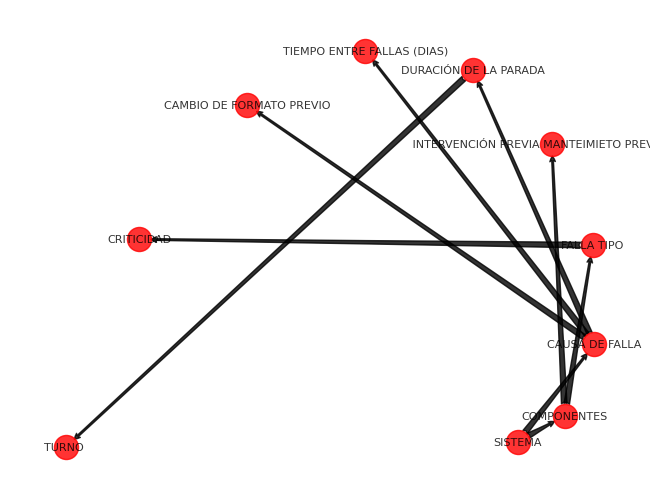

In [ ]:
# búsqueda de árboles (TreeSearch).

#Especificamos el nodo que debera ser el raiz utilizando el algoritmo de arboles pq el dataset tienen mas de 4 nodos o variables
est = TreeSearch(data, root_node='SISTEMA')
#En la variable dag contendremos la red bayesiana obtenida por Aprendizaje Estructurado utilizando el estimador de tipo chow-liu
dag = est.estimate(estimator_type='chow-liu')
#Mostramos el DAG con un layout de tipo spiral
pos = nx.spiral_layout(dag)
nx.draw(dag, pos=pos, with_labels=True,node_color='r', font_size=8, arrowstyle='fancy', alpha=0.8)
#Guardamos el grafo DAG en un archivo .png que podemos visualizar y/o descargar
plt.savefig('plt.png')

### Información del DAG

In [ ]:
print("Nodos: ", dag.nodes())
print("---------------")
print("Aristas: ", dag.edges())

print("--------" "\n")

print("Origen y destino de las Aristas")
print("-------------------------------" "\n")
nx.to_pandas_edgelist(dag)

Nodos:  ['SISTEMA', 'COMPONENTES', 'CAUSA DE FALLA', 'FALLA TIPO', ' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO', 'DURACIÓN DE LA PARADA', 'TIEMPO ENTRE FALLAS (DIAS)', 'CAMBIO DE FORMATO PREVIO', 'CRITICIDAD', 'TURNO ']
---------------
Aristas:  [('SISTEMA', 'COMPONENTES'), ('SISTEMA', 'CAUSA DE FALLA'), ('COMPONENTES', 'FALLA TIPO'), ('COMPONENTES', ' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO'), ('CAUSA DE FALLA', 'DURACIÓN DE LA PARADA'), ('CAUSA DE FALLA', 'TIEMPO ENTRE FALLAS (DIAS)'), ('CAUSA DE FALLA', 'CAMBIO DE FORMATO PREVIO'), ('FALLA TIPO', 'CRITICIDAD'), ('DURACIÓN DE LA PARADA', 'TURNO ')]
--------

Origen y destino de las Aristas
-------------------------------



,source,target,weight
0,SISTEMA,COMPONENTES,None
1,SISTEMA,CAUSA DE FALLA,None
2,COMPONENTES,FALLA TIPO,None
3,COMPONENTES,INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO,None
4,CAUSA DE FALLA,DURACIÓN DE LA PARADA,None
5,CAUSA DE FALLA,TIEMPO ENTRE FALLAS (DIAS),None
6,CAUSA DE FALLA,CAMBIO DE FORMATO PREVIO,None
7,FALLA TIPO,CRITICIDAD,None
8,DURACIÓN DE LA PARADA,TURNO,None


### Estimación de probabilidad condicional, basado en el atributo variable  SISTEMA como nodo raiz

In [ ]:
#A partir del DAG (Grafo Dirigido Aciclico) creamos la red bayesiana
model = BayesianNetwork(dag)
#A partir del modelo creado generamos los CPDs automaticamente a partir del metod fit.
#El metodo fit lo aplicamos al modelo teniendo como parametro el conjunto de datos
model.fit(data)
model.get_cpds()

[<TabularCPD representing P(SISTEMA:3) at 0x7b6cb29f1c90>,
 <TabularCPD representing P(COMPONENTES:4 | SISTEMA:3) at 0x7b6cb29f0af0>,
 <TabularCPD representing P(CAUSA DE FALLA:4 | SISTEMA:3) at 0x7b6cb29f0850>,
 <TabularCPD representing P(FALLA TIPO:3 | COMPONENTES:4) at 0x7b6cb29f23e0>,
 <TabularCPD representing P( INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO:2 | COMPONENTES:4) at 0x7b6cb29f0d60>,
 <TabularCPD representing P(DURACIÓN DE LA PARADA:4 | CAUSA DE FALLA:4) at 0x7b6cb29f07c0>,
 <TabularCPD representing P(TIEMPO ENTRE FALLAS (DIAS):3 | CAUSA DE FALLA:4) at 0x7b6cb29f2620>,
 <TabularCPD representing P(CAMBIO DE FORMATO PREVIO:2 | CAUSA DE FALLA:4) at 0x7b6cb29f02e0>,
 <TabularCPD representing P(CRITICIDAD:3 | FALLA TIPO:3) at 0x7b6cb29f2470>,
 <TabularCPD representing P(TURNO :3 | DURACIÓN DE LA PARADA:4) at 0x7b6cb29f0e50>]

In [ ]:
# Los CPDs

for cpd in model.get_cpds():
    print(cpd)
    print('                   ')

+------------+-----------+
| SISTEMA(1) | 0.0723684 |
+------------+-----------+
| SISTEMA(2) | 0.355263  |
+------------+-----------+
| SISTEMA(3) | 0.572368  |
+------------+-----------+
                   
+----------------+---------------------+---------------------+----------------------+
| SISTEMA        | SISTEMA(1)          | SISTEMA(2)          | SISTEMA(3)           |
+----------------+---------------------+---------------------+----------------------+
| COMPONENTES(1) | 0.18181818181818182 | 0.14814814814814814 | 0.034482758620689655 |
+----------------+---------------------+---------------------+----------------------+
| COMPONENTES(2) | 0.45454545454545453 | 0.6481481481481481  | 0.09195402298850575  |
+----------------+---------------------+---------------------+----------------------+
| COMPONENTES(3) | 0.0                 | 0.2037037037037037  | 0.0                  |
+----------------+---------------------+---------------------+----------------------+
| COMPONENTES(4) 

### Inferencias

In [ ]:
#la variable infer identifica el objeto que ejecutara el algoritmo de calculo de inferencias a partir del la Eliminacion de la Variable
infer = VariableElimination(model)

In [93]:
#1.  ¿Cuál es la probabilidad de ocurrencia de parada corta dado una criticidad media, en sistema de calentamiento y que la causa de la falla haya sido por desgaste y capacidad?
inferir_p1 = infer.query(["DURACIÓN DE LA PARADA"], evidence={
    "SISTEMA": 3,
    "CAUSA DE FALLA":1,
    })
print(inferir_p1)
print("La probabilidad es de ",inferir_p1.values[0]*100, "%")

+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA    |   phi(DURACIÓN DE LA PARADA) |
+==========================+==============================+
| DURACIÓN DE LA PARADA(1) |                       0.3438 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(2) |                       0.0156 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(3) |                       0.0469 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(4) |                       0.5938 |
+--------------------------+------------------------------+
La probabilidad es de  34.375 %


In [94]:
#2. ¿Cuál es la probabilidad de ocurrencia de parada moderada dado una falla de tipo Mecánica y ajuste, que el componente haya sido de movimiento y que haya sido en el primer turno?.

inferir_p2 = infer.query(["DURACIÓN DE LA PARADA"], evidence={
    "FALLA TIPO": 2,
    "COMPONENTES":3,
    'TURNO ':1
    })
print(inferir_p2)
print("La probabilidad es de ",inferir_p2.values[3]*100, "%")

+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA    |   phi(DURACIÓN DE LA PARADA) |
+==========================+==============================+
| DURACIÓN DE LA PARADA(1) |                       0.3563 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(2) |                       0.0091 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(3) |                       0.0709 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(4) |                       0.5638 |
+--------------------------+------------------------------+
La probabilidad es de  56.37803267468382 %


In [96]:
#3. ¿Cuál es la probabilidad de ocurrencia de parada extensa dado que se cambió el formato de producción, en la tarde, en un sistema de calentamiento, y criticidad baja?.

inferir_p3 = infer.query(["DURACIÓN DE LA PARADA"], evidence={
    "CAMBIO DE FORMATO PREVIO": 1,
    "TURNO ":2,
    'CRITICIDAD':3
    })
print(inferir_p3)
print("La probabilidad es de ",inferir_p3.values[1]*100, "%")

+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA    |   phi(DURACIÓN DE LA PARADA) |
+==========================+==============================+
| DURACIÓN DE LA PARADA(1) |                       0.4315 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(2) |                       0.0000 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(3) |                       0.0761 |
+--------------------------+------------------------------+
| DURACIÓN DE LA PARADA(4) |                       0.4924 |
+--------------------------+------------------------------+
La probabilidad es de  0.0 %


In [ ]:
# 4.  ¿Cuál es la probabilidad de tener un tiempo entre fallas cortas dado que la causa era de diseño y fabricación,
#      no tuvo mantenimiento preventivo previo y el tipo de falla sea de calentamiento?

inferir_p4 = infer.query(["TIEMPO ENTRE FALLAS (DIAS)"], evidence={
    "CAUSA DE FALLA": 4,
    "FALLA TIPO":3,
    " INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO":0
    })
print(inferir_p4)
print("La probabilidad es de ",inferir_p4.values[0]*100, "%")


+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)    |   phi(TIEMPO ENTRE FALLAS (DIAS)) |
+===============================+===================================+
| TIEMPO ENTRE FALLAS (DIAS)(1) |                            0.3488 |
+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)(2) |                            0.4419 |
+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)(3) |                            0.2093 |
+-------------------------------+-----------------------------------+
La probabilidad es de  34.883720930232556 %


In [ ]:
# 5. ¿Cuál es la probabilidad de tener un tiempo entre fallas media dado que el sistema sea de procesos térmico,
#     el tipo de falla fue de eléctricas y no hubo mantenimiento preventivo previo?

inferir_p5 = infer.query(["TIEMPO ENTRE FALLAS (DIAS)"], evidence={
    "SISTEMA": 3,
    "FALLA TIPO":1,
    " INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO":0
    })
print(inferir_p5)
print("La probabilidad es de ",inferir_p5.values[1]*100, "%")

+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)    |   phi(TIEMPO ENTRE FALLAS (DIAS)) |
+===============================+===================================+
| TIEMPO ENTRE FALLAS (DIAS)(1) |                            0.3586 |
+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)(2) |                            0.4020 |
+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)(3) |                            0.2394 |
+-------------------------------+-----------------------------------+
La probabilidad es de  40.19934880750839 %


In [ ]:
#6. ¿Cuál es la probabilidad de tener un tiempo entre fallas largas dado que no
#    tuvo mantenimiento preventivo previo, la causa de la falla es por desgaste y capacidad de un sistema mecánico eléctrico?

inferir_p6 = infer.query(["TIEMPO ENTRE FALLAS (DIAS)"], evidence={
    " INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO": 1,
    "CAUSA DE FALLA":1
    })
print(inferir_p6)
print("La probabilidad es de ",inferir_p6.values[2]*100, "%")

+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)    |   phi(TIEMPO ENTRE FALLAS (DIAS)) |
+===============================+===================================+
| TIEMPO ENTRE FALLAS (DIAS)(1) |                            0.2969 |
+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)(2) |                            0.4062 |
+-------------------------------+-----------------------------------+
| TIEMPO ENTRE FALLAS (DIAS)(3) |                            0.2969 |
+-------------------------------+-----------------------------------+
La probabilidad es de  29.6875 %


In [ ]:
df_num['DURACIÓN DE LA PARADA'] = df_num['DURACIÓN DE LA PARADA'].replace({'Parada Corta': 1, 'Parada Extensa': 2, 'Parada Larga': 3, 'Parada Moderada': 4})
df_num[' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO'] = df_num[' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO'].replace({'NO':0,'SI':1})
df_num['CAMBIO DE FORMATO PREVIO'] = df_num['CAMBIO DE FORMATO PREVIO'].replace({'NO':0,'SI':1})
df_num['FALLA TIPO'] = df_num['FALLA TIPO'].replace({'Fallas Eléctricas y de Control':1,'Fallas Mecánicas y de Ajuste':2,'Fallas por Deterioro y Otras':3})
df_num['CAUSA DE FALLA'] = df_num['CAUSA DE FALLA'].replace({'Desgaste y Capacidad':1,  'Errores Operacionales e Instalacion':2, 'Otras Causas':3, 'Problemas de Diseño y Fabricación':4})
df_num['TURNO '] = df_num['TURNO '].replace({'Tercer Turno':3, 'Segundo Turno':2, 'Primer Turno':1})
df_num['SISTEMA'] = df_num['SISTEMA'].replace({'Sistemas de Proceso Térmico':3, 'Sistemas de Movimiento':2, 'Sistemas de Control y Automatización':1})
df_num['COMPONENTES'] = df_num['COMPONENTES'].replace({'Componentes Térmicos':4, 'Componentes Mecanicos, Eléctricos y Electrónicos':2, 'Componentes de Estructura y Soporte':1, 'Componentes de Movimiento':3})
df_num['TIEMPO ENTRE FALLAS (DIAS)'] = df_num['TIEMPO ENTRE FALLAS (DIAS)'].replace({'corto':1, 'medio':2, 'largo':3})

In [97]:
#7. ¿Cuál es la probabilidad de que una falla de tipo mecánicas y de ajuste (atascamiento) ocurra en el turno 3 sin conocer la criticidad del subsistema?

inferir_p7 = infer.query(["FALLA TIPO"], evidence={
    "TURNO ": 3
    })
print(inferir_p7)
print("La probabilidad es de ",inferir_p7.values[1]*100, "%")

+---------------+-------------------+
| FALLA TIPO    |   phi(FALLA TIPO) |
+===============+===================+
| FALLA TIPO(1) |            0.3938 |
+---------------+-------------------+
| FALLA TIPO(2) |            0.3889 |
+---------------+-------------------+
| FALLA TIPO(3) |            0.2173 |
+---------------+-------------------+
La probabilidad es de  38.885241525347205 %


In [98]:
# 8. ¿Cuál es la probabilidad de que un evento de falla ocurra en el turno 2 si la última intervención de mantenimiento preventivo fue realizada y el sistema es de calentamiento?
inferir_p8 = infer.query(["TURNO "], evidence={

    ' INTERVENCIÓN PREVIA MANTEIMIETO PREVENTIVO':1,
    'SISTEMA':3
    })
print(inferir_p8)
print("La probabilidad es de ",inferir_p8.values[1]*100, "%")



+-----------+---------------+
| TURNO     |   phi(TURNO ) |
+===========+===============+
| TURNO (1) |        0.3245 |
+-----------+---------------+
| TURNO (2) |        0.3684 |
+-----------+---------------+
| TURNO (3) |        0.3071 |
+-----------+---------------+
La probabilidad es de  36.83908596152431 %


In [99]:
# 9. ¿Cuál es la probabilidad de que una falla por deterioro (sobrecalentamiento) ocurra en un componente térmico si el sistema es de proceso térmico y la criticidad es alta?

inferir_p9 = infer.query(["FALLA TIPO"], evidence={

    'COMPONENTES':4,
    'CRITICIDAD':1
    })
print(inferir_p9)
print("La probabilidad es de ",inferir_p9.values[2]*100, "%")

+---------------+-------------------+
| FALLA TIPO    |   phi(FALLA TIPO) |
+===============+===================+
| FALLA TIPO(1) |            0.3757 |
+---------------+-------------------+
| FALLA TIPO(2) |            0.3804 |
+---------------+-------------------+
| FALLA TIPO(3) |            0.2439 |
+---------------+-------------------+
La probabilidad es de  24.39427768130323 %
